# Laboratorio 2: Armado de un esquema de aprendizaje automático

En el laboratorio final se espera que puedan poner en práctica los conocimientos adquiridos en el curso, trabajando con un conjunto de datos de clasificación.

El objetivo es que se introduzcan en el desarrollo de un esquema para hacer tareas de aprendizaje automático: selección de un modelo, ajuste de hiperparámetros y evaluación.

El conjunto de datos a utilizar está en `./data/loan_data.csv`. Si abren el archivo verán que al principio (las líneas que empiezan con `#`) describen el conjunto de datos y sus atributos (incluyendo el atributo de etiqueta o clase).

Se espera que hagan uso de las herramientas vistas en el curso. Se espera que hagan uso especialmente de las herramientas brindadas por `scikit-learn`.

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# TODO: Agregar las librerías que hagan falta
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline


## Carga de datos y división en entrenamiento y evaluación

La celda siguiente se encarga de la carga de datos (haciendo uso de pandas). Estos serán los que se trabajarán en el resto del laboratorio.

In [23]:
dataset = pd.read_csv("./loan_data.csv", comment="#")

# División entre instancias y etiquetas
X, y = dataset.iloc[:, 1:], dataset.TARGET

# división entre entrenamiento y evaluación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [24]:
dataset

,TARGET,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,0,4700,88026.0,115506.0,6.0,0.0,0.0,182.248332,0.0,27.0,29.209023
1,0,19300,39926.0,101208.0,4.0,0.0,0.0,140.051638,0.0,14.0,31.545694
2,0,5700,71556.0,79538.0,2.0,0.0,0.0,92.643085,0.0,15.0,41.210012
3,0,13000,44875.0,57713.0,0.0,1.0,0.0,184.990324,1.0,12.0,28.602076
4,0,19300,72752.0,106084.0,11.0,0.0,0.0,193.707100,1.0,13.0,30.686106
...,...,...,...,...,...,...,...,...,...,...,...
1849,1,53400,228236.0,305514.0,6.0,0.0,0.0,11.148069,0.0,2.0,34.558417
1850,1,53600,235895.0,299772.0,5.0,0.0,0.0,112.748282,7.0,22.0,44.945929
1851,1,53600,208197.0,297280.0,4.0,1.0,1.0,160.485251,2.0,29.0,41.646731
1852,1,65500,205156.0,290239.0,2.0,0.0,0.0,98.808206,1.0,21.0,144.189001



Documentación:

- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

## Ejercicio 1: Descripción de los Datos y la Tarea

Responder las siguientes preguntas:

1. ¿De qué se trata el conjunto de datos?
2. ¿Cuál es la variable objetivo que hay que predecir? ¿Qué significado tiene?
3. ¿Qué información (atributos) hay disponible para hacer la predicción?
4. ¿Qué atributos imagina ud. que son los más determinantes para la predicción?

**No hace falta escribir código para responder estas preguntas.**

1. El conjunto de datos es sobre informacion bancaria de personas. El banco busca automatizar las desiciones al otorgar un credito y así cumplir con la "Equal Credit Opportunity Act"
2. El objetivo del data set es la de predecir si las personas del mismo son aptas o no para recibir un credito hipotecario.
La variable objetivo es la variable Target la cual muestra si el cliente incumplió el pago del prestamo con un "1" o si cumplió con un "0"

3. Los atributos disponibles para la prediccion son:
TARGET  Label: 1 = client defaulted on loan - 0 = loan repaid
 LOAN    Amount of the loan request
 MORTDUE Amount due on existing mortgage
 VALUE   Value of current property
 YOJ     Years at present job
 DEROG   Number of major derogatory reports
 DELINQ  Number of delinquent credit lines
 CLAGE   Age of oldest trade line in months
 NINQ    Number of recent credit lines
 CLNO    Number of credit lines
 DEBTINC Debt-to-income ratio




c:\Users\lucas\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\lucas\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\lucas\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

<AxesSubplot:xlabel='DEBTINC', ylabel='Density'>

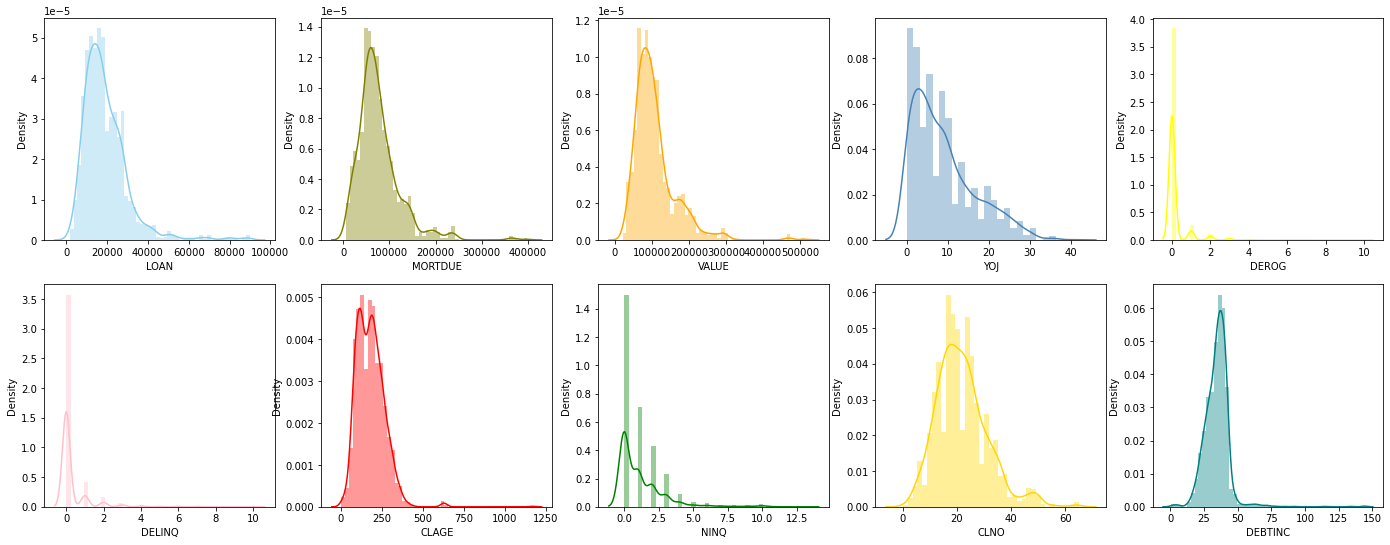

In [25]:
f, axes = plt.subplots(2, 5, figsize=(24,9))
sns.distplot( dataset['LOAN'] , color="skyblue", ax=axes[0, 0])
sns.distplot( dataset['MORTDUE'] , color="olive", ax=axes[0, 1])
sns.distplot( dataset['VALUE'] , color="orange", ax=axes[0, 2])
sns.distplot( dataset['YOJ'] , color="steelblue", ax=axes[0, 3])
sns.distplot( dataset['DEROG'] , color="yellow", ax=axes[0, 4])
sns.distplot( dataset['DELINQ'] , color="pink", ax=axes[1, 0])
sns.distplot( dataset['CLAGE'] , color="red", ax=axes[1, 1])
sns.distplot( dataset['NINQ'] , color="green", ax=axes[1, 2])
sns.distplot( dataset['CLNO'] , color="gold", ax=axes[1, 3])
sns.distplot( dataset['DEBTINC'] , color="teal", ax=axes[1, 4])

<AxesSubplot:xlabel='TARGET', ylabel='DEBTINC'>

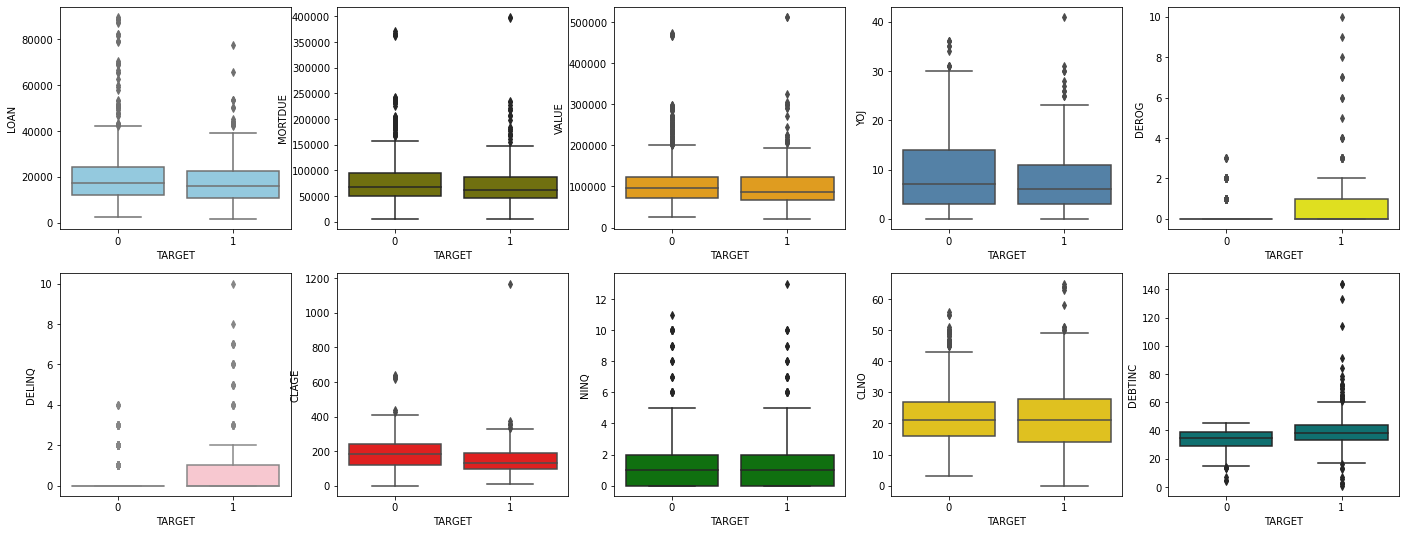

In [26]:
f, axes = plt.subplots(2, 5, figsize=(24,9))
sns.boxplot(x = 'TARGET', y = 'LOAN', data = dataset , color="skyblue", ax=axes[0, 0])
sns.boxplot(x = 'TARGET', y = 'MORTDUE', data = dataset , color="olive", ax=axes[0, 1])
sns.boxplot(x = 'TARGET', y = 'VALUE', data = dataset , color="orange", ax=axes[0, 2])
sns.boxplot(x = 'TARGET', y = 'YOJ', data = dataset , color="steelblue", ax=axes[0, 3])
sns.boxplot(x = 'TARGET', y = 'DEROG', data = dataset , color="yellow", ax=axes[0, 4])
sns.boxplot(x = 'TARGET', y = 'DELINQ', data = dataset , color="pink", ax=axes[1, 0])
sns.boxplot(x = 'TARGET', y = 'CLAGE', data = dataset , color="red", ax=axes[1, 1])
sns.boxplot(x = 'TARGET', y = 'NINQ', data = dataset , color="green", ax=axes[1, 2])
sns.boxplot(x = 'TARGET', y = 'CLNO', data = dataset , color="gold", ax=axes[1, 3])
sns.boxplot(x = 'TARGET', y = 'DEBTINC', data = dataset , color="teal", ax=axes[1, 4])

4. Entre los atributos que podemos establecer como importantes a la hora de evaluar podemos encontrar:
DELINQ  Number of delinquent credit lines (creditos inpagos)
VALUE   Value of current property
LOAN    Amount of the loan request
MORTDUE Amount due on existing mortgage

## Ejercicio 2: Predicción con Modelos Lineales

En este ejercicio se entrenarán modelos lineales de clasificación para predecir la variable objetivo.

Para ello, deberán utilizar la clase SGDClassifier de scikit-learn.

Documentación:
- https://scikit-learn.org/stable/modules/sgd.html
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html


### Ejercicio 2.1: SGDClassifier con hiperparámetros por defecto

Entrenar y evaluar el clasificador SGDClassifier usando los valores por omisión de scikit-learn para todos los parámetros. Únicamente **fijar la semilla aleatoria** para hacer repetible el experimento.

Evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión

In [43]:
from sklearn.linear_model import SGDClassifier
model1 = SGDClassifier(random_state=42)
model1.fit(X_train, y_train)

SGDClassifier(random_state=42)

In [44]:
model1=Pipeline([('standardscaler', StandardScaler()), ('model',SGDClassifier(random_state=5))])

model1.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('model', SGDClassifier(random_state=5))])

In [45]:
score = model1.score(X_train, y_train)
print("Training score: ", score) 

Training score:  0.8543492919757248


In [46]:
ypredtrain = model1.predict(X_train)

In [47]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
acs=accuracy_score(y_train,ypredtrain) 
rs=recall_score(y_train,ypredtrain, average=None) 
ps=precision_score(y_train,ypredtrain, average=None)
f1 = f1_score(y_train, ypredtrain, average=None)
print("accuracy score : ",acs)
print("precision score : ",ps)
print("recall score : ",rs)
print("f1 score : ",f1)

accuracy score :  0.8543492919757248
precision score :  [0.88426626 0.60869565]
recall score :  [0.94886364 0.39043825]
f1 score :  [0.91542678 0.47572816]


In [48]:
from sklearn.metrics import classification_report

print(classification_report(y_train, ypredtrain))

              precision    recall  f1-score   support

           0       0.88      0.95      0.92      1232
           1       0.61      0.39      0.48       251

    accuracy                           0.85      1483
   macro avg       0.75      0.67      0.70      1483
weighted avg       0.84      0.85      0.84      1483



In [49]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train, ypredtrain)
print(cm.T)

[[1169  153]
 [  63   98]]


[Text(30.5, 0.5, 'Predicted Label'), Text(0.5, 21.5, 'True Label')]

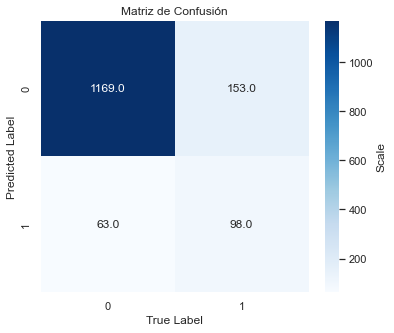

In [50]:
sns.set(color_codes=True)
plt.figure(1, figsize=(6, 5))

plt.title("Matriz de Confusión" )
# define labels
labels = ["0", "1"] 
sns.set(font_scale=1)
ax = sns.heatmap(cm.T, annot=True, fmt='.1f', cmap="Blues", cbar_kws={'label': 'Scale'})
 
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
 
ax.set(ylabel="Predicted Label", xlabel="True Label")

In [51]:
tp, fp, fn, tn= confusion_matrix(y_train, ypredtrain).ravel()
(tp, fp, fn, tn)

(1169, 63, 153, 98)

In [52]:
ypred = model1.predict(X_test)

In [53]:
# import Performance measure
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
acs=accuracy_score(y_test,ypred) 
rs=recall_score(y_test,ypred, average=None) 
ps=precision_score(y_test,ypred, average=None)
f1 = f1_score(y_test, ypred,  average=None)
print("accuracy score : ",acs)
print("precision score : ",ps)
print("recall score : ",rs)
print("f1 score : ",f1)

accuracy score :  0.8571428571428571
precision score :  [0.88461538 0.57575758]
recall score :  [0.95527157 0.32758621]
f1 score :  [0.91858679 0.41758242]


In [54]:
from sklearn.metrics import classification_report

print(classification_report(y_test, ypred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92       313
           1       0.58      0.33      0.42        58

    accuracy                           0.86       371
   macro avg       0.73      0.64      0.67       371
weighted avg       0.84      0.86      0.84       371



In [55]:
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_test, ypred)
print(cm1.T)

[[299  39]
 [ 14  19]]


[Text(30.5, 0.5, 'Predicted Label'), Text(0.5, 21.5, 'True Label')]

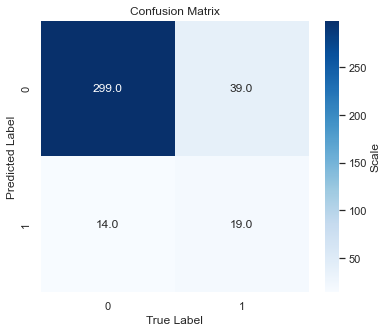

In [56]:
sns.set(color_codes=True)
plt.figure(1, figsize=(6, 5))

plt.title("Confusion Matrix" )
# define labels
labels = ["0", "1"] 
sns.set(font_scale=1)
ax = sns.heatmap(cm1.T, annot=True, fmt='.1f', cmap="Blues", cbar_kws={'label': 'Scale'})
 
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
 
ax.set(ylabel="Predicted Label", xlabel="True Label")

### Ejercicio 2.2: Ajuste de Hiperparámetros

Seleccionar valores para los hiperparámetros principales del SGDClassifier. Como mínimo, probar diferentes funciones de loss, tasas de entrenamiento y tasas de regularización.

Para ello, usar grid-search y 5-fold cross-validation sobre el conjunto de entrenamiento para explorar muchas combinaciones posibles de valores.

Reportar accuracy promedio y varianza para todas las configuraciones.

Para la mejor configuración encontrada, evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión

Documentación:
- https://scikit-learn.org/stable/modules/grid_search.html
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [57]:
from sklearn.model_selection import GridSearchCV

model = SGDClassifier(random_state=5)

In [58]:
model.get_params()

{'alpha': 0.0001,
 'average': False,
 'class_weight': None,
 'early_stopping': False,
 'epsilon': 0.1,
 'eta0': 0.0,
 'fit_intercept': True,
 'l1_ratio': 0.15,
 'learning_rate': 'optimal',
 'loss': 'hinge',
 'max_iter': 1000,
 'n_iter_no_change': 5,
 'n_jobs': None,
 'penalty': 'l2',
 'power_t': 0.5,
 'random_state': 5,
 'shuffle': True,
 'tol': 0.001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [59]:
model.max_iter = 3000
model.loss_functions

{'hinge': (sklearn.linear_model._sgd_fast.Hinge, 1.0),
 'squared_hinge': (sklearn.linear_model._sgd_fast.SquaredHinge, 1.0),
 'perceptron': (sklearn.linear_model._sgd_fast.Hinge, 0.0),
 'log': (sklearn.linear_model._sgd_fast.Log,),
 'modified_huber': (sklearn.linear_model._sgd_fast.ModifiedHuber,),
 'squared_error': (sklearn.linear_model._sgd_fast.SquaredLoss,),
 'squared_loss': (sklearn.linear_model._sgd_fast.SquaredLoss,),
 'huber': (sklearn.linear_model._sgd_fast.Huber, 0.1),
 'epsilon_insensitive': (sklearn.linear_model._sgd_fast.EpsilonInsensitive,
  0.1),
 'squared_epsilon_insensitive': (sklearn.linear_model._sgd_fast.SquaredEpsilonInsensitive,
  0.1)}

In [60]:
from scipy import stats
param_grid = {
    'model__loss': ['hinge', 'log', 'squared_error', 'squared_hinge'],
    'model__learning_rate':['constant', 'optimal','adaptive'],
    'model__alpha': [0.0, 0.001, 0.0001, 0.00001, 1.0, 10.0],
     }

In [61]:
#Podemos listar todas las combinaciones para usarlas a mano con ParameterGrid
from sklearn.model_selection import ParameterGrid
for params in ParameterGrid(param_grid):
    print(params)

{'model__alpha': 0.0, 'model__learning_rate': 'constant', 'model__loss': 'hinge'}
{'model__alpha': 0.0, 'model__learning_rate': 'constant', 'model__loss': 'log'}
{'model__alpha': 0.0, 'model__learning_rate': 'constant', 'model__loss': 'squared_error'}
{'model__alpha': 0.0, 'model__learning_rate': 'constant', 'model__loss': 'squared_hinge'}
{'model__alpha': 0.0, 'model__learning_rate': 'optimal', 'model__loss': 'hinge'}
{'model__alpha': 0.0, 'model__learning_rate': 'optimal', 'model__loss': 'log'}
{'model__alpha': 0.0, 'model__learning_rate': 'optimal', 'model__loss': 'squared_error'}
{'model__alpha': 0.0, 'model__learning_rate': 'optimal', 'model__loss': 'squared_hinge'}
{'model__alpha': 0.0, 'model__learning_rate': 'adaptive', 'model__loss': 'hinge'}
{'model__alpha': 0.0, 'model__learning_rate': 'adaptive', 'model__loss': 'log'}
{'model__alpha': 0.0, 'model__learning_rate': 'adaptive', 'model__loss': 'squared_error'}
{'model__alpha': 0.0, 'model__learning_rate': 'adaptive', 'model__lo

In [77]:
from sklearn.model_selection import GridSearchCV

model = Pipeline([('standardscaler', StandardScaler()), ('model',SGDClassifier(random_state=5, eta0=0.1))])

cv = GridSearchCV(model, param_grid, scoring ='accuracy', refit=True, cv=5)
cv.fit(X_train, y_train);

c:\Users\lucas\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
20 fits failed out of a total of 360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\lucas\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\lucas\anaconda3\lib\site-packages\sklearn\pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\Users\lucas\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py", line 883, in fit
    return self._fit(
  File "c:\Users\luca

In [78]:
results = cv.cv_results_

data_sdg_classifier=pd.DataFrame(results)
data_sdg_classifier.sort_values('rank_test_score')[:6]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__alpha,param_model__learning_rate,param_model__loss,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
21,0.006601,8.000732e-04,0.0010,3.371748e-07,0.001,adaptive,log,"{'model__alpha': 0.001, 'model__learning_rate'...",0.865320,0.868687,0.865320,0.891892,0.858108,0.869865,0.011542,1
32,0.004401,4.900182e-04,0.0006,4.898625e-04,0.0001,adaptive,hinge,"{'model__alpha': 0.0001, 'model__learning_rate...",0.875421,0.861953,0.868687,0.881757,0.861486,0.869861,0.007829,2
20,0.004401,4.899210e-04,0.0008,3.999949e-04,0.001,adaptive,hinge,"{'model__alpha': 0.001, 'model__learning_rate'...",0.875421,0.861953,0.868687,0.881757,0.861486,0.869861,0.007829,2
8,0.004201,3.999473e-04,0.0008,4.002334e-04,0.0,adaptive,hinge,"{'model__alpha': 0.0, 'model__learning_rate': ...",0.875421,0.861953,0.868687,0.881757,0.861486,0.869861,0.007829,2
44,0.004201,3.999712e-04,0.0008,4.001380e-04,0.00001,adaptive,hinge,"{'model__alpha': 1e-05, 'model__learning_rate'...",0.875421,0.861953,0.868687,0.881757,0.861486,0.869861,0.007829,2
36,0.003001,4.370285e-07,0.0008,3.999710e-04,0.00001,constant,hinge,"{'model__alpha': 1e-05, 'model__learning_rate'...",0.865320,0.861953,0.858586,0.891892,0.868243,0.869199,0.011799,6


In [79]:
data_sdg_classifier[['param_model__learning_rate','param_model__loss','param_model__alpha','mean_test_score','std_test_score','rank_test_score']]


,param_model__learning_rate,param_model__loss,param_model__alpha,mean_test_score,std_test_score,rank_test_score
0,constant,hinge,0.0,0.863798,0.009331,16
1,constant,log,0.0,0.866498,0.015238,12
2,constant,squared_error,0.0,0.553631,0.071240,63
3,constant,squared_hinge,0.0,0.736432,0.066145,60
4,optimal,hinge,0.0,NaN,NaN,70
...,...,...,...,...,...,...
67,optimal,squared_hinge,10.0,0.830749,0.001259,40
68,adaptive,hinge,10.0,0.830749,0.001259,40
69,adaptive,log,10.0,0.830749,0.001259,40
70,adaptive,squared_error,10.0,0.830749,0.001259,40


Mejor Modelo

In [80]:
best_model = cv.best_estimator_
best_model

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('model',
                 SGDClassifier(alpha=0.001, eta0=0.1, learning_rate='adaptive',
                               loss='log', random_state=5))])

In [81]:
best_model.classes_

array([0, 1], dtype=int64)

In [82]:
best_model.predict(X_train)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [83]:
cv.best_params_

{'model__alpha': 0.001,
 'model__learning_rate': 'adaptive',
 'model__loss': 'log'}

Entrenamiento mejor modelo:

In [84]:
BM = Pipeline([('standardscaler', StandardScaler()), ('model',SGDClassifier(alpha=0.0, loss='hinge', max_iter=3000, random_state=5, eta0=0.1, learning_rate='adaptive', penalty='l2'))])
BM.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('model',
                 SGDClassifier(alpha=0.0, eta0=0.1, learning_rate='adaptive',
                               max_iter=3000, random_state=5))])

In [85]:
score = BM.score(X_train, y_train)
print("Training score: ", score) 

Training score:  0.8732299393122049


In [86]:
ypredtrain = BM.predict(X_train)
ypredtrain

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

Evaluación entrenamiento: 

In [87]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
acs=accuracy_score(y_train,ypredtrain) 
rs=recall_score(y_train,ypredtrain, average= None) 
ps=precision_score(y_train,ypredtrain, average= None)
f1 = f1_score(y_train, ypredtrain, average= None)
print("accuracy score : ",acs)
print("precision score : ",ps)
print("recall score : ",rs)
print("f1 score : ",f1)

accuracy score :  0.8732299393122049
precision score :  [0.871266   0.90909091]
recall score :  [0.99431818 0.27888446]
f1 score :  [0.92873389 0.42682927]


In [88]:
from sklearn.metrics import classification_report

print(classification_report(y_train, ypredtrain))

              precision    recall  f1-score   support

           0       0.87      0.99      0.93      1232
           1       0.91      0.28      0.43       251

    accuracy                           0.87      1483
   macro avg       0.89      0.64      0.68      1483
weighted avg       0.88      0.87      0.84      1483



In [89]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train, ypredtrain)
print(cm.T)

[[1225  181]
 [   7   70]]


[Text(30.5, 0.5, 'Predicted Label'), Text(0.5, 21.5, 'True Label')]

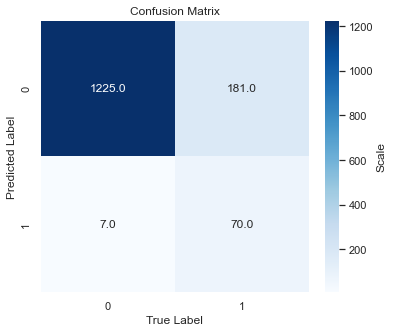

In [90]:
sns.set(color_codes=True)
plt.figure(1, figsize=(6, 5))

plt.title("Confusion Matrix" )
# define labels
labels = ["0", "1"] 
sns.set(font_scale=1)
ax = sns.heatmap(cm.T, annot=True, fmt='.1f', cmap="Blues", cbar_kws={'label': 'Scale'})
 
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
 
ax.set(ylabel="Predicted Label", xlabel="True Label")

Predicción Evaluación  

In [91]:
ypred = BM.predict(X_test)

In [92]:
# import Performance measure
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
acs=accuracy_score(y_test,ypred) 
rs=recall_score(y_test,ypred, average=None) 
ps=precision_score(y_test,ypred, average=None)
f1 = f1_score(y_test, ypred,  average=None)
print("accuracy score : ",acs)
print("precision score : ",ps)
print("recall score : ",rs)
print("f1 score : ",f1)

accuracy score :  0.8840970350404312
precision score :  [0.88135593 0.94117647]
recall score :  [0.99680511 0.27586207]
f1 score :  [0.93553223 0.42666667]


In [93]:
print(classification_report(y_test, ypred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94       313
           1       0.94      0.28      0.43        58

    accuracy                           0.88       371
   macro avg       0.91      0.64      0.68       371
weighted avg       0.89      0.88      0.86       371



In [94]:
cm1 = confusion_matrix(y_test, ypred)
print(cm1.T)

[[312  42]
 [  1  16]]


[Text(30.5, 0.5, 'Predicted Label'), Text(0.5, 21.5, 'True Label')]

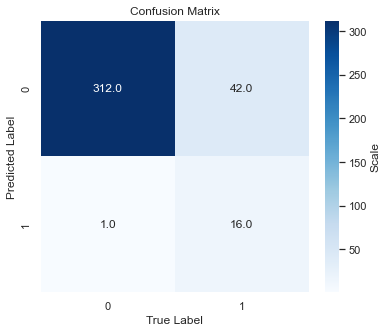

In [95]:
sns.set(color_codes=True)
plt.figure(1, figsize=(6, 5))

plt.title("Confusion Matrix" )
# define labels
labels = ["0", "1"] 
sns.set(font_scale=1)
ax = sns.heatmap(cm1.T, annot=True, fmt='.1f', cmap="Blues", cbar_kws={'label': 'Scale'})
 
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
 
ax.set(ylabel="Predicted Label", xlabel="True Label")

## Ejercicio 3: Árboles de Decisión

En este ejercicio se entrenarán árboles de decisión para predecir la variable objetivo.

Para ello, deberán utilizar la clase DecisionTreeClassifier de scikit-learn.

Documentación:
- https://scikit-learn.org/stable/modules/tree.html
  - https://scikit-learn.org/stable/modules/tree.html#tips-on-practical-use
- https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
- https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html

### Ejercicio 3.1: DecisionTreeClassifier con hiperparámetros por defecto

Entrenar y evaluar el clasificador DecisionTreeClassifier usando los valores por omisión de scikit-learn para todos los parámetros. Únicamente **fijar la semilla aleatoria** para hacer repetible el experimento.

Evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión


### Ejercicio 3.2: Ajuste de Hiperparámetros

Seleccionar valores para los hiperparámetros principales del DecisionTreeClassifier. Como mínimo, probar diferentes criterios de partición (criterion), profundidad máxima del árbol (max_depth), y cantidad mínima de samples por hoja (min_samples_leaf).

Para ello, usar grid-search y 5-fold cross-validation sobre el conjunto de entrenamiento para explorar muchas combinaciones posibles de valores.

Reportar accuracy promedio y varianza para todas las configuraciones.

Para la mejor configuración encontrada, evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión


Documentación:
- https://scikit-learn.org/stable/modules/grid_search.html
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html